# Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import pickle

# Configurações

In [2]:
model_path = Path(r'..\..\06_modelos')
data_path = Path(r'..\..\01_dados\04_dados_modelos')

## Importação dos Modelos

In [3]:
with open(model_path / 'melhor_modelo_ne.pkl', 'rb') as file:
    model_ne =  pickle.load(file)

with open(model_path / 'melhor_modelo_n.pkl', 'rb') as file:
    model_n =  pickle.load(file)
    
with open(model_path / 'melhor_modelo_s.pkl', 'rb') as file:
    model_s =  pickle.load(file)

with open(model_path / 'melhor_modelo_se.pkl', 'rb') as file:
    model_se =  pickle.load(file)

## Importação dos Dados

In [4]:
df_ne = pd.read_csv(data_path / 'dados_ne_lag_20.csv')
df_n = pd.read_csv(data_path / 'dados_n_lag_35.csv')
df_s = pd.read_csv(data_path / 'dados_s_lag_35.csv')
df_se = pd.read_csv(data_path / 'dados_se_lag_35.csv')

# Preparando os dados para extrair as características
X_ne = df_ne.drop(columns=['din_instante', 'cmo'])
X_n = df_n.drop(columns=['din_instante', 'cmo'])
X_s = df_s.drop(columns=['din_instante', 'cmo'])
X_se = df_se.drop(columns=['din_instante', 'cmo'])

# Análises

## Random Forest Regressor

O Random Forest é um método de ensemble baseado em árvores de decisão. A importância de cada característica é calculada considerando a redução de impureza (variância para regressão) que resulta de divisões baseadas nessa característica nas árvores.

### Cálculo da Importância das Características

1. **Impureza de Gini ou Variância**: Medida da desordem ou variabilidade dos dados. Em regressão, a impureza de um nó é frequentemente medida pela variância dos valores alvo.

2. **Redução da Impureza**: Para cada divisão que utiliza uma característica \(X_i\), a redução da impureza é dada por:
   $$ \Delta I(X_i) = I(\text{parent}) - \left(\frac{N_{\text{left}}}{N} I(\text{left}) + \frac{N_{\text{right}}}{N} I(\text{right})\right) $$
   onde $$ I(\text{parent})\ $$ é a impureza do nó pai, e $$ I(\text{left})\  , I(\text{right})\ $$ são as impurezas dos nós filhos.

3. **Soma e Média da Redução de Impureza**: A importância de cada característica é a média da redução de impureza ao longo de todas as árvores na floresta.

## Gradient Boosting Regressor

O Gradient Boosting constrói árvores sequencialmente, focando na correção dos erros das árvores anteriores. A importância das características é determinada pela sua contribuição na redução do erro total.

### Cálculo da Importância das Características

1. **Função de Perda**: O modelo minimiza uma função de perda específica, quantificando a diferença entre as previsões e os verdadeiros valores alvo.

2. **Gradiente da Função de Perda**: Cada árvore subsequente modela o gradiente negativo da função de perda, reduzindo o erro.

3. **Contribuição para a Redução do Erro**: A importância de cada característica é a soma da sua contribuição para a redução do erro em todas as árvores, normalizada para somar 1.

In [5]:
# Criando gráficos para cada modelo
models = {
    'NE': (model_ne, X_ne),
    'N': (model_n, X_n),
    'S': (model_s, X_s),
    'SE': (model_se, X_se)
}

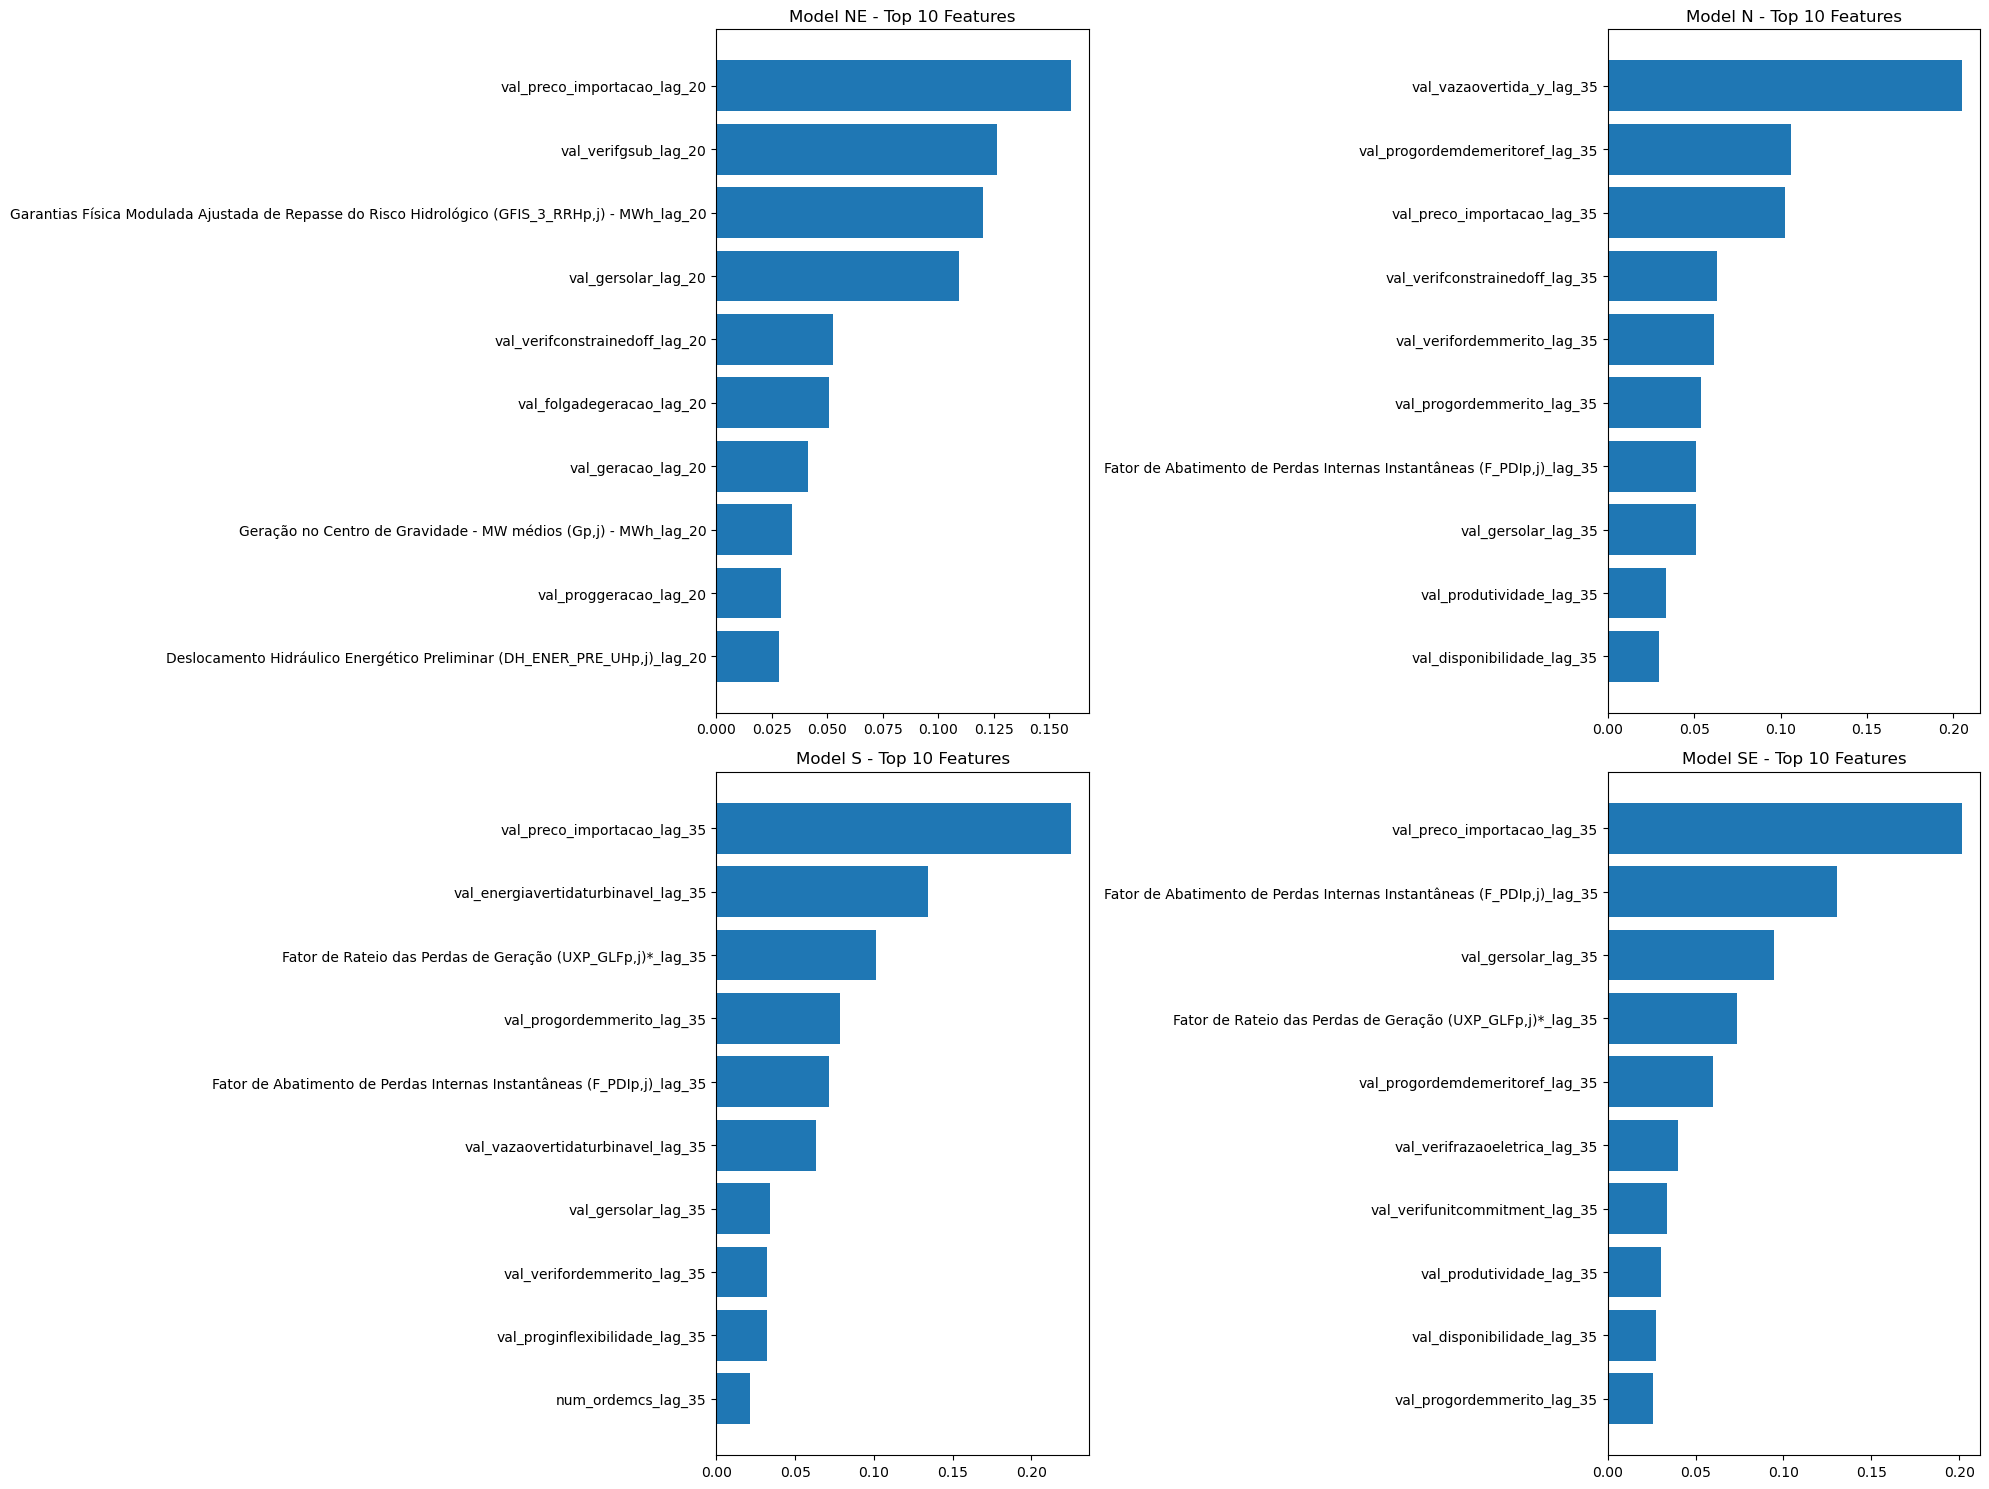

In [6]:
plt.figure(figsize=(20, 15))

for i, (region, (model, X)) in enumerate(models.items(), 1):
    feature_importances = model.feature_importances_
    feature_names = X.columns
    importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importances.sort_values(by='Importance', ascending=False, inplace=True)

    plt.subplot(2, 2, i)
    plt.barh(importances['Feature'][:10], importances['Importance'][:10])
    plt.title(f'Model {region} - Top 10 Features')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [8]:
# Extração das importâncias das características para cada modelo
importances_ne = pd.DataFrame({'Feature': X_ne.columns, 'Importance': model_ne.feature_importances_})
importances_n = pd.DataFrame({'Feature': X_n.columns, 'Importance': model_n.feature_importances_})
importances_s = pd.DataFrame({'Feature': X_s.columns, 'Importance': model_s.feature_importances_})
importances_se = pd.DataFrame({'Feature': X_se.columns, 'Importance': model_se.feature_importances_})

# Ordenação dos DataFrames
importances_ne.sort_values(by='Importance', ascending=False, inplace=True)
importances_n.sort_values(by='Importance', ascending=False, inplace=True)
importances_s.sort_values(by='Importance', ascending=False, inplace=True)
importances_se.sort_values(by='Importance', ascending=False, inplace=True)

In [12]:
# Primeiro, vamos extrair as 10 características mais importantes de cada modelo
top_features_ne = importances_ne['Feature'][:10].str[:-7]
top_features_n = importances_n['Feature'][:10].str[:-7]
top_features_s = importances_s['Feature'][:10].str[:-7]
top_features_se = importances_se['Feature'][:10].str[:-7]

# Em seguida, vamos contar a frequência com que cada característica aparece nos modelos
all_features = pd.concat([top_features_ne, top_features_n, top_features_s, top_features_se])
feature_counts = all_features.value_counts()

# Variáveis comuns em todos os 4 modelos
common_in_4 = feature_counts[feature_counts == 4]
print("Variáveis comuns em todos os 4 modelos:")
print(common_in_4)

# Variáveis comuns em 3 dos modelos
common_in_3 = feature_counts[feature_counts == 3]
print("\nVariáveis comuns em 3 dos modelos:")
print(common_in_3)

# Variáveis comuns em 2 dos modelos
common_in_2 = feature_counts[feature_counts == 2]
print("\nVariáveis comuns em 2 dos modelos:")
print(common_in_2)

Variáveis comuns em todos os 4 modelos:
val_preco_importacao    4
val_gersolar            4
Name: Feature, dtype: int64

Variáveis comuns em 3 dos modelos:
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)    3
val_progordemmerito                                               3
Name: Feature, dtype: int64

Variáveis comuns em 2 dos modelos:
val_progordemdemeritoref                               2
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*    2
val_disponibilidade                                    2
val_produtividade                                      2
val_verifordemmerito                                   2
val_verifconstrainedoff                                2
Name: Feature, dtype: int64


referencias : https://dados.ons.org.br/
todas as tabelas usadas estão no script: Dados CCEE Hidraulicas_MRE VS Dados ONS1.ipynb